In [122]:
import warnings
warnings.filterwarnings("ignore")

In [123]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)

import sys
import pandas as pd
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# per selecció de models
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# per modelar les dades
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.multiclass import OneVsRestClassifier

# performance metrics
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,plot_confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer,precision_score
from sklearn.metrics import average_precision_score


# Participant data

In [124]:
contact_common = pd.read_csv('data/POLYMOD/2008_Mossong_POLYMOD_contact_common.csv')
participant_common = pd.read_csv('data/POLYMOD/2008_Mossong_POLYMOD_participant_common.csv')
participant_extra = pd.read_csv('data/POLYMOD/2008_Mossong_POLYMOD_participant_extra.csv')

In [125]:
participants = pd.merge(participant_common,participant_extra,on='part_id')
print('Participants merged: '+ str(participants.shape))
participants.head()

Participants merged: (7290, 20)


,part_id,hh_id,part_age,part_gender,type,part_occupation,part_occupation_detail,part_education,part_education_length,participant_school_year,participant_nationality,child_care,child_care_detail,child_relationship,child_nationality,problems,diary_how,diary_missed_unsp,diary_missed_skin,diary_missed_noskin
0,1,Mo08HH1,8.0,F,3,5.0,7.0,3.0,13.0,NaN,IT,Y,NaN,2.0,IT,N,2.0,2.0,NaN,NaN
1,2,Mo08HH2,6.0,M,3,5.0,7.0,3.0,11.0,NaN,IT,Y,NaN,1.0,IT,N,3.0,1.0,NaN,NaN
2,3,Mo08HH3,0.0,F,3,6.0,7.0,3.0,13.0,NaN,IT,N,NaN,1.0,IT,N,2.0,1.0,NaN,NaN
3,4,Mo08HH4,1.0,M,3,6.0,NaN,3.0,13.0,NaN,IT,N,NaN,1.0,IT,N,2.0,1.0,NaN,NaN
4,5,Mo08HH5,2.0,M,3,6.0,7.0,6.0,18.0,NaN,IT,N,NaN,1.0,IT,N,3.0,2.0,NaN,NaN


In [126]:
contacts = pd.merge(contact_common,participants,on='part_id')
print('Contacts: '+ str(contacts.shape))
contacts.head()

Contacts: (97904, 34)


,part_id,cont_id,cnt_age_exact,cnt_age_est_min,cnt_age_est_max,cnt_gender,cnt_home,cnt_work,cnt_school,cnt_transport,cnt_leisure,cnt_otherplace,frequency_multi,phys_contact,duration_multi,hh_id,part_age,part_gender,type,part_occupation,part_occupation_detail,part_education,part_education_length,participant_school_year,participant_nationality,child_care,child_care_detail,child_relationship,child_nationality,problems,diary_how,diary_missed_unsp,diary_missed_skin,diary_missed_noskin
0,1,101,42.0,42.0,NaN,F,True,False,False,False,False,False,1.0,1.0,4.0,Mo08HH1,8.0,F,3,5.0,7.0,3.0,13.0,NaN,IT,Y,NaN,2.0,IT,N,2.0,2.0,NaN,NaN
1,1,102,9.0,9.0,NaN,F,False,False,True,False,False,False,1.0,1.0,5.0,Mo08HH1,8.0,F,3,5.0,7.0,3.0,13.0,NaN,IT,Y,NaN,2.0,IT,N,2.0,2.0,NaN,NaN
2,1,103,42.0,40.0,45.0,F,False,False,False,False,True,False,3.0,1.0,4.0,Mo08HH1,8.0,F,3,5.0,7.0,3.0,13.0,NaN,IT,Y,NaN,2.0,IT,N,2.0,2.0,NaN,NaN
3,1,104,8.0,8.0,NaN,F,False,False,True,False,False,False,1.0,1.0,5.0,Mo08HH1,8.0,F,3,5.0,7.0,3.0,13.0,NaN,IT,Y,NaN,2.0,IT,N,2.0,2.0,NaN,NaN
4,1,105,29.0,28.0,30.0,F,False,False,True,False,False,False,2.0,1.0,3.0,Mo08HH1,8.0,F,3,5.0,7.0,3.0,13.0,NaN,IT,Y,NaN,2.0,IT,N,2.0,2.0,NaN,NaN


Selecció de columnes interessants.

In [127]:
contacts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97904 entries, 0 to 97903
Data columns (total 34 columns):
part_id                    97904 non-null int64
cont_id                    97904 non-null int64
cnt_age_exact              97784 non-null float64
cnt_age_est_min            96096 non-null float64
cnt_age_est_max            44756 non-null float64
cnt_gender                 96543 non-null object
cnt_home                   97877 non-null object
cnt_work                   97876 non-null object
cnt_school                 97876 non-null object
cnt_transport              97876 non-null object
cnt_leisure                97881 non-null object
cnt_otherplace             97889 non-null object
frequency_multi            96497 non-null float64
phys_contact               94958 non-null float64
duration_multi             96481 non-null float64
hh_id                      97904 non-null object
part_age                   97278 non-null float64
part_gender                97325 non-null object
type

In [128]:
contacts_filtered = contacts[['part_id','part_occupation','part_age', 'part_gender', 'part_education',
                            'cont_id','cnt_age_exact','cnt_gender','cnt_age_est_min','cnt_age_est_max'
                          ]]
contacts_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97904 entries, 0 to 97903
Data columns (total 10 columns):
part_id            97904 non-null int64
part_occupation    96104 non-null float64
part_age           97278 non-null float64
part_gender        97325 non-null object
part_education     77501 non-null float64
cont_id            97904 non-null int64
cnt_age_exact      97784 non-null float64
cnt_gender         96543 non-null object
cnt_age_est_min    96096 non-null float64
cnt_age_est_max    44756 non-null float64
dtypes: float64(6), int64(2), object(2)
memory usage: 8.2+ MB


## Dealing with NaN 
### AGE

In [129]:
#### age 
contacts_filtered.loc[:,'cont_age'] =  (contacts_filtered['cnt_age_est_max'] + contacts_filtered['cnt_age_est_min']) /2
contacts_filtered.loc[:,'cont_age'] = contacts_filtered['cont_age'].fillna(contacts_filtered['cnt_age_exact'])
contacts_filtered.loc[:,'cont_age'] = contacts_filtered['cont_age'].fillna(contacts_filtered['cnt_age_est_max'])
contacts_filtered.loc[:,'cont_age'] = contacts_filtered['cont_age'].fillna(contacts_filtered['cnt_age_est_min'])
contacts_filtered = contacts_filtered.drop(columns = ['cnt_age_est_max','cnt_age_est_min','cnt_age_exact'])

In [130]:
contacts_filtered.loc[:,'cnt_gender'] = contacts_filtered['cnt_gender'].fillna('ND')
contacts_filtered.loc[:,'part_gender'] = contacts_filtered['part_gender'].fillna('ND')

contacts_filtered = contacts_filtered.dropna(subset = ['cont_age','part_age','part_occupation'])

contacts_filtered.loc[:,'part_education'] = contacts_filtered['part_education'].fillna(3) #secondary       




In [131]:
contacts_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95449 entries, 0 to 97903
Data columns (total 8 columns):
part_id            95449 non-null int64
part_occupation    95449 non-null float64
part_age           95449 non-null float64
part_gender        95449 non-null object
part_education     95449 non-null float64
cont_id            95449 non-null int64
cnt_gender         95449 non-null object
cont_age           95449 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 6.6+ MB


In [132]:
data = contacts_filtered.copy()

In [133]:
# variables numèriques ## frequency_multi,
num_variables = [column for column, datatype in data.dtypes.items() if datatype in (np.int64, np.float64)]

# variables categòriques
categorical_variables = [column for column in data.columns if column not in num_variables]

In [134]:
cat = pd.DataFrame(columns=["Length of unique values","Values per field"], index = [categorical_variables])

#transformem a tipus category aquelles variables no-numèriques
for col in categorical_variables:
    if 'ID' not in col:
        data[col]= data[col].astype('category')
        cat["Length of unique values"][col] = len(data[col].unique())
        vals = str(data[col].unique()).partition("\n")[0]
        cat["Values per field"][col] = vals

cat

,Length of unique values,Values per field
part_gender,3,"[F, M, ND]"
cnt_gender,3,"[F, M, ND]"


In [135]:
label_encoder = LabelEncoder()
le_count = 0
for col in categorical_variables:
    label_encoder.fit(data[col])
    data[col] = label_encoder.transform(data[col])
    le_count += 1
print('{} columns were label encoded.'.format(le_count))

2 columns were label encoded.


In [136]:
data.head()

,part_id,part_occupation,part_age,part_gender,part_education,cont_id,cnt_gender,cont_age
0,1,5.0,8.0,0,3.0,101,0,42.0
1,1,5.0,8.0,0,3.0,102,0,9.0
2,1,5.0,8.0,0,3.0,103,0,42.5
3,1,5.0,8.0,0,3.0,104,0,8.0
4,1,5.0,8.0,0,3.0,105,0,29.0


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95449 entries, 0 to 97903
Data columns (total 8 columns):
part_id            95449 non-null int64
part_occupation    95449 non-null float64
part_age           95449 non-null float64
part_gender        95449 non-null int64
part_education     95449 non-null float64
cont_id            95449 non-null int64
cnt_gender         95449 non-null int64
cont_age           95449 non-null float64
dtypes: float64(4), int64(4)
memory usage: 6.6 MB


## Construction of socioeconomic index (education and occupation)

Per crear un índex socioeconòmic, ens basarem en el nivell d'educació i el tipus de feina. Però primer, netejem. Com construir l'índex? Ponderació d'educació i ocupació? 

In [138]:
## segons enquesta POLYMOD

education_level = {0: 0,#'no formal schooling',
                   1: 0, # 'primary school',
                   2: 1,#'secondary school',
                   3: 1, #'secondary school',
                   4: 1, #'secondary school',
                   5: 2, #'university degree',
                   6: 2, #'university degree',
                   7: 3,#'university degree',
                   8: 3 #'university degree'
}
part_occupation_d = {1: 6, #'working',
                     2: 5, #'retired', 
                     3: 5,#'at home (housewife)', 
                     4: 0,#'currently unemployed / job seeking',
                     5: 4,#'in fulltime or further education',
                     6: 3} #other


In [139]:
data["part_occupation"] = data["part_occupation"].apply(lambda x: part_occupation_d.get(x))
data["part_education"] = data["part_education"].apply(lambda x: education_level.get(x))

In [140]:
data.head()

,part_id,part_occupation,part_age,part_gender,part_education,cont_id,cnt_gender,cont_age
0,1,4,8.0,0,1,101,0,42.0
1,1,4,8.0,0,1,102,0,9.0
2,1,4,8.0,0,1,103,0,42.5
3,1,4,8.0,0,1,104,0,8.0
4,1,4,8.0,0,1,105,0,29.0


### Agrupem per participants:

In [141]:
original_occupation = dict(data[['part_id','part_occupation']].values)
original_education =  dict(data[['part_id','part_education']].values)
original_gender = dict(data[['part_id','part_gender']].values)
#original_isc = dict(data[['part_id','socioeconomic_index']].values)
original_ages = dict(data[['part_id','part_age']].values)
dict_number_contacts = data.groupby('part_id')['cont_id'].count().to_dict()
#data["number_contacts"] = data["part_id"].apply(lambda x: dict_number_contacts.get(x))

In [142]:
data.head()

,part_id,part_occupation,part_age,part_gender,part_education,cont_id,cnt_gender,cont_age
0,1,4,8.0,0,1,101,0,42.0
1,1,4,8.0,0,1,102,0,9.0
2,1,4,8.0,0,1,103,0,42.5
3,1,4,8.0,0,1,104,0,8.0
4,1,4,8.0,0,1,105,0,29.0


In [143]:
#bins= [0,10,20,30,40,50,60,70,80] #8
#edat_bins = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70+']

bins = [0,15,25,40,65,100]
edat_bins = ['0-14','15-24','25-39','40-64','+65']

data['cont_age'] = pd.cut(data['cont_age'], bins=bins, labels=edat_bins, right=True)
data['part_age'] = pd.cut(data['part_age'], bins=bins, labels=edat_bins, right=True)
data = data.dropna()
data.head()

,part_id,part_occupation,part_age,part_gender,part_education,cont_id,cnt_gender,cont_age
0,1,4,0-14,0,1,101,0,40-64
1,1,4,0-14,0,1,102,0,0-14
2,1,4,0-14,0,1,103,0,40-64
3,1,4,0-14,0,1,104,0,0-14
4,1,4,0-14,0,1,105,0,25-39


## Per edats:

    - Agrupar per participants, sumar els contactes de cada edat.
    - Calcular el percentatge de contactes per rang d'edat.

In [144]:
gr = data.groupby('part_id')['cont_age'].value_counts()
grouped_data = pd.DataFrame(gr)
grouped_data.columns = ['number_contacts']
grouped_data = grouped_data.reset_index()
grouped_data.head()

,part_id,cont_age,number_contacts
0,1,0-14,13
1,1,40-64,6
2,1,25-39,1
3,2,+65,2
4,2,40-64,2


In [145]:
grouped_data["percentage_contacts"] = grouped_data["part_id"].apply(lambda x: dict_number_contacts.get(x))
grouped_data['percentage_contacts'] = grouped_data["number_contacts"] /grouped_data["percentage_contacts"] 
grouped_data.head()

,part_id,cont_age,number_contacts,percentage_contacts
0,1,0-14,13,0.65
1,1,40-64,6,0.30
2,1,25-39,1,0.05
3,2,+65,2,0.50
4,2,40-64,2,0.50


In [146]:
#grouped_data["isc"] = grouped_data["part_id"].apply(lambda x: original_isc.get(x))
grouped_data["gender"] = grouped_data["part_id"].apply(lambda x: original_gender.get(x))

grouped_data["occupation"] = grouped_data["part_id"].apply(lambda x: original_occupation.get(x))
grouped_data["education"] = grouped_data["part_id"].apply(lambda x: original_education.get(x))

grouped_data["part_id"] = grouped_data["part_id"].apply(lambda x: original_ages.get(x))
grouped_data['part_age'] = pd.cut(grouped_data['part_id'], bins=bins, labels=edat_bins, right=True)
grouped_data.head()

,part_id,cont_age,number_contacts,percentage_contacts,gender,occupation,education,part_age
0,8.0,0-14,13,0.65,0,4,1,0-14
1,8.0,40-64,6,0.30,0,4,1,0-14
2,8.0,25-39,1,0.05,0,4,1,0-14
3,6.0,+65,2,0.50,1,4,1,0-14
4,6.0,40-64,2,0.50,1,4,1,0-14


In [147]:
data = grouped_data[['part_age','cont_age','number_contacts','percentage_contacts','occupation','education','gender']]
#data = grouped_data[['part_age','cont_age','number_contacts','percentage_contacts']]#,'percentage_contacts','occupation','education','gender']]
data.head()

,part_age,cont_age,number_contacts,percentage_contacts,occupation,education,gender
0,0-14,0-14,13,0.65,4,1,0
1,0-14,40-64,6,0.30,4,1,0
2,0-14,25-39,1,0.05,4,1,0
3,0-14,+65,2,0.50,4,1,1
4,0-14,40-64,2,0.50,4,1,1


## Classifiquem nombre de contactes

In [148]:
data.groupby(['part_age']).mean()

,number_contacts,percentage_contacts,occupation,education,gender
part_age,,,,,
0-14,4.505463,0.297546,4.249569,1.301754,0.509344
15-24,4.734706,0.305725,4.293708,1.130183,0.464193
25-39,4.200938,0.294616,5.226117,1.612441,0.457418
40-64,3.854820,0.312100,5.207027,1.496225,0.443089
+65,2.625796,0.352991,5.047771,1.352707,0.447452


In [149]:
#plt.bar(data['cont_age'],data['number_contacts'])
#plt.show()

In [150]:
# variables numèriques
num_variables = [column for column, datatype in data.dtypes.items() if datatype in (np.int64, np.float64)]

# variables categòriques
categorical_variables = [column for column in data.columns if column not in num_variables]


In [151]:
data.describe()

,number_contacts,percentage_contacts,occupation,education,gender
count,22600.000000,22600.000000,22600.000000,22600.000000,22600.000000
mean,4.183097,0.305786,4.767522,1.393363,0.469513
std,4.852177,0.213022,1.445050,0.894422,0.502174
min,1.000000,0.011236,0.000000,0.000000,0.000000
25%,1.000000,0.142857,4.000000,1.000000,0.000000
50%,3.000000,0.250000,5.000000,1.000000,0.000000
75%,5.000000,0.428571,6.000000,2.000000,1.000000
max,54.000000,1.000000,6.000000,3.000000,2.000000


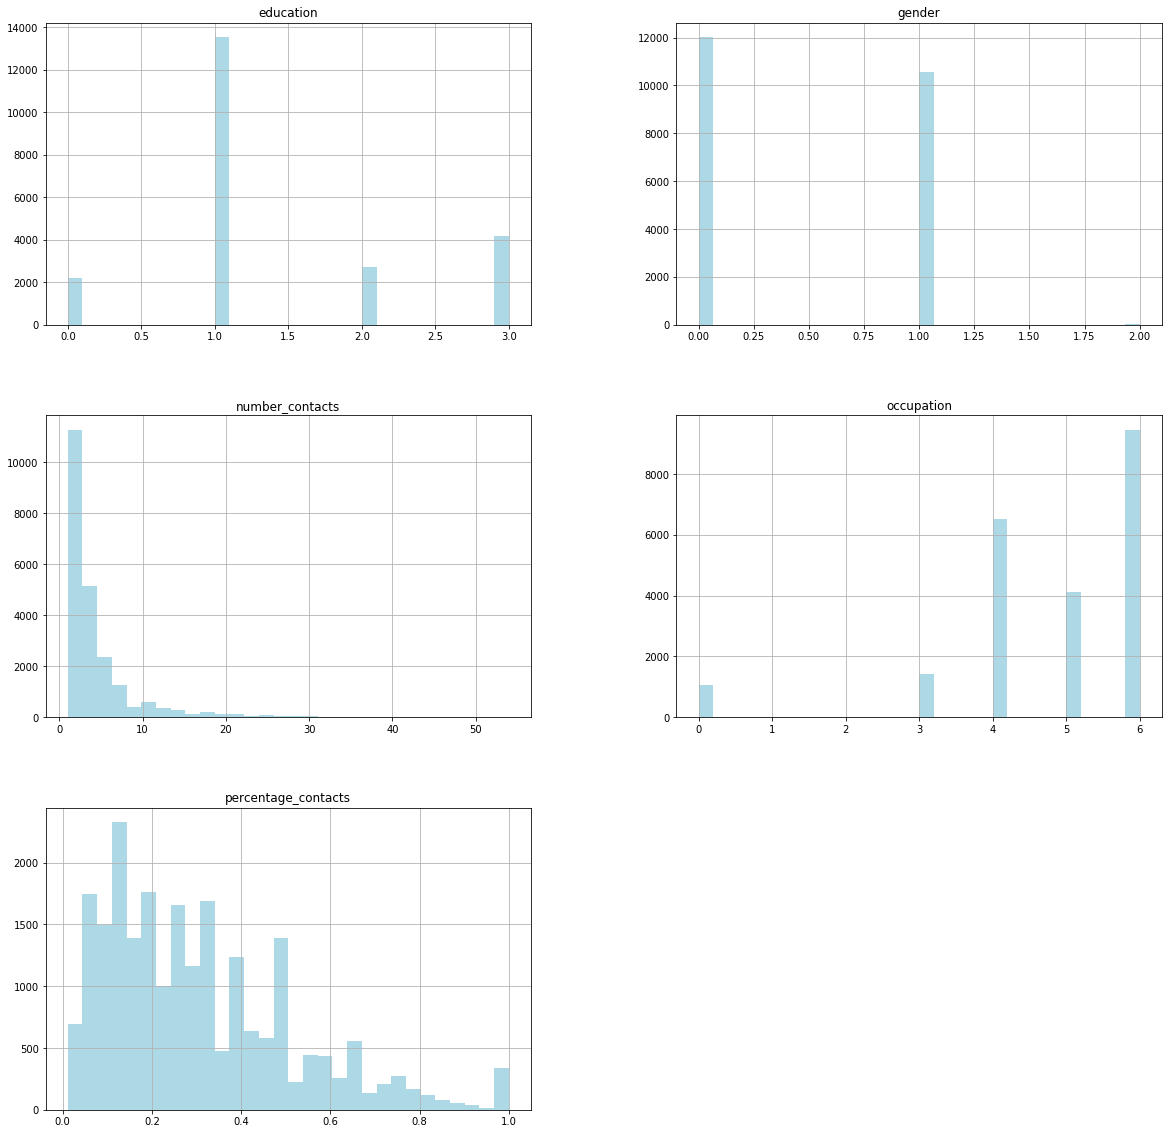

In [152]:
data.hist(bins = 30, figsize = (20,20), color = 'lightblue')
plt.show()

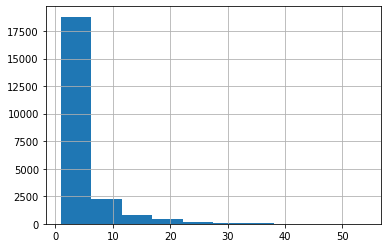

In [153]:
target_variable = 'number_contacts'
data[target_variable].hist()

In [154]:
data.head()

,part_age,cont_age,number_contacts,percentage_contacts,occupation,education,gender
0,0-14,0-14,13,0.65,4,1,0
1,0-14,40-64,6,0.30,4,1,0
2,0-14,25-39,1,0.05,4,1,0
3,0-14,+65,2,0.50,4,1,1
4,0-14,40-64,2,0.50,4,1,1


In [155]:
bins= [-1,3,7,13,100] #8
number_contacts_bins = ['1-2','3-7','7-11','+13']

data['number_contacts'] = pd.cut(data['number_contacts'], bins=bins,labels = number_contacts_bins, right=True)
data.head()

,part_age,cont_age,number_contacts,percentage_contacts,occupation,education,gender
0,0-14,0-14,7-11,0.65,4,1,0
1,0-14,40-64,3-7,0.30,4,1,0
2,0-14,25-39,1-2,0.05,4,1,0
3,0-14,+65,1-2,0.50,4,1,1
4,0-14,40-64,1-2,0.50,4,1,1


In [156]:
data

,part_age,cont_age,number_contacts,percentage_contacts,occupation,education,gender
0,0-14,0-14,7-11,0.650000,4,1,0
1,0-14,40-64,3-7,0.300000,4,1,0
2,0-14,25-39,1-2,0.050000,4,1,0
3,0-14,+65,1-2,0.500000,4,1,1
4,0-14,40-64,1-2,0.500000,4,1,1
...,...,...,...,...,...,...,...
22595,25-39,25-39,1-2,0.200000,6,3,1
22596,0-14,0-14,7-11,0.464286,4,1,0
22597,0-14,40-64,3-7,0.250000,4,1,0
22598,0-14,25-39,3-7,0.214286,4,1,0


In [157]:
original_data = data.copy()

In [158]:
#original_data.to_excel('data/original_data.xlsx')

## Explorem les dades:

Voldrem predir el nombre de contactes: creem bins (multiclass regression)

In [159]:
target_variable = 'number_contacts'
data[target_variable].describe()

count     22600
unique        4
top         1-2
freq      14374
Name: number_contacts, dtype: object

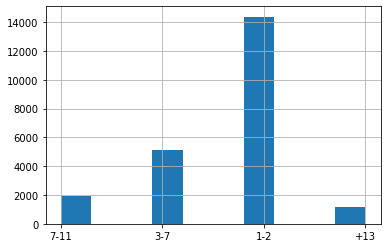

In [160]:
data[target_variable].hist()

In [161]:
# variables numèriques
num_variables = [column for column, datatype in data.dtypes.items() if datatype in (np.int64, np.float64)]

# variables categòriques
categorical_variables = [column for column in data.columns if column not in num_variables]

cat = pd.DataFrame(columns=["Length of unique values","Values per field"], index = [categorical_variables])

#transformem a tipus category aquelles variables no-numèriques
for col in categorical_variables:
    if 'ID' not in col:
        data[col]= data[col].astype('category')
        cat["Length of unique values"][col] = len(data[col].unique())
        vals = str(data[col].unique()).partition("\n")[0]
        cat["Values per field"][col] = vals

cat

,Length of unique values,Values per field
part_age,5,"[0-14, 15-24, 25-39, 40-64, +65]"
cont_age,5,"[0-14, 40-64, 25-39, +65, 15-24]"
number_contacts,4,"[7-11, 3-7, 1-2, +13]"


In [162]:
label_encoder = LabelEncoder()
le_count = 0
for col in categorical_variables:
    label_encoder.fit(data[col])
    data[col] = label_encoder.transform(data[col])
    le_count += 1
print('{} columns were label encoded.'.format(le_count))

3 columns were label encoded.


In [163]:
data.head()

,part_age,cont_age,number_contacts,percentage_contacts,occupation,education,gender
0,1,1,3,0.65,4,1,0
1,1,4,2,0.30,4,1,0
2,1,3,1,0.05,4,1,0
3,1,0,1,0.50,4,1,1
4,1,4,1,0.50,4,1,1


In [164]:
data.to_excel('data/post_processed_data.xlsx')

##  Modeling multiclass: 



In [165]:
from collections import Counter
from matplotlib import pyplot
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestRegressor

In [166]:
data = data[['part_age','occupation','education','gender','number_contacts']]
data.head()

,part_age,occupation,education,gender,number_contacts
0,1,4,1,0,3
1,1,4,1,0,2
2,1,4,1,0,1
3,1,4,1,1,1
4,1,4,1,1,1


In [167]:
target_variable = 'number_contacts'

In [168]:
oversample = SMOTE()

X = data.drop([target_variable],axis=1,inplace=False).values
y = data[[target_variable]].values
#train_val, test = train_test_split(data, test_size = .2 ,random_state = 1)
#fem una copia dels valors de target
#target = train_val[target_variable].copy()
#train_val = train_val.drop([target_variable], axis=1, inplace=False)
X_o,target = oversample.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_o,target,
                                                    test_size=0.3)


Class=3, n=14374 (25.000%)
Class=2, n=14374 (25.000%)
Class=1, n=14374 (25.000%)
Class=0, n=14374 (25.000%)


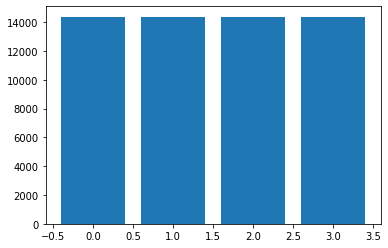

In [169]:
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
    
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

## Evaluate

In [61]:
def evaluate(model,train_x,test_x,train_y,test_y, cf = 'coefficients'):
    cnf_matrix = metrics.confusion_matrix(y_test, model.predict(test_x))
    class_names=[0,1,2,3,4] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap --> matriu de confusió
    #sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")
    
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix',)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    

    print('Accuracy of Classifier on test set: {:.2f}'.format(model.score(test_x, test_y)*100))
    print('Mean squared error: ' + str(mean_squared_error(y_test, model.predict(X_test))))

    model.fit(train_x, train_y)
    pred_probabilities = model.predict(test_x)
    #print(classification_report(y_test, model.predict(test_x)))


    return  pred_probabilities,cnf_matrix

## Gradient boosting

In [58]:
#clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=4, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.7658668876417191

Accuracy of Classifier on test set: 76.59
Mean squared error: 0.9506949414290558


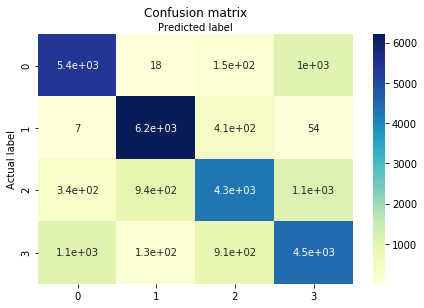

In [62]:
a,b = evaluate(clf,X_train,X_test,y_train,y_test, cf = 'coefficients')

In [63]:
conf_matrix

array([[5383,   18,  148, 1035],
       [   7, 6206,  410,   54],
       [ 341,  936, 4290, 1137],
       [1091,  129,  910, 4454]])

In [67]:
data.shape

(29362, 5)

## Generar xarxa test

Suposem una xarxa de 1610 persones (/100 de Bacelona)

In [295]:
bcn = pd.read_excel('data/demografia_Barcelona.xlsx')
bcn.head()

,Unnamed: 0,Edat,Gènere,Educació,Ocupació
0,0,0,0,1,3
1,1,0,0,1,3
2,2,0,0,1,3
3,3,0,0,1,3
4,4,0,0,1,3


In [298]:
bcn.drop(columns = ['Unnamed: 0'],inplace = True)
bcn = bcn.rename(columns = {'Edat':'part_age','Gènere':'gender','Educació':'education','Ocupació':'occupation'})

In [322]:
bcn.drop(columns = ['Unnamed: 0'],inplace = True)
bcn = bcn.rename(columns = {'Edat':'part_age','Gènere':'gender','Educació':'education','Ocupació':'occupation'})
bcn['PNumContactes'] = pd.Series(clf.predict(bcn))
bcn.head()

,part_age,occupation,education,gender,PNumContactes
0,0,3,1,0,0
1,0,3,1,0,1
2,0,3,1,0,1
3,0,3,1,0,1
4,0,3,1,0,1


In [330]:
number_contacts_bins = {0:'1-2',1:'3-7',2:'7-11',3:'+13'}
bcn.PNumContactes = bcn.PNumContactes.replace(number_contacts_bins)

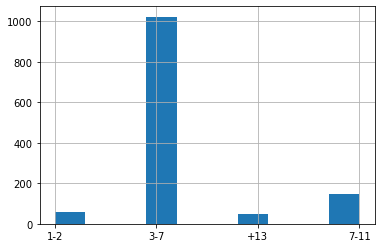

In [332]:
bcn.PNumContactes.hist()
plt.show()

In [334]:
bcn.to_excel('data/PredictedNContacts_Barcelona.xlsx')